<a href="https://colab.research.google.com/github/marilena238/datastories_for_emme/blob/main/Copy_of_Marilena_Homework_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import spacy

In [ ]:
!python -m spacy download el_core_news_sm

2023-06-14 08:01:04.687873: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 21.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [ ]:
start_page=2
end_page=4
start_url = 'https://www.newsbomb.gr/politikh?page='

test_url = start_url + str(start_page)

In [ ]:
response = requests.get(test_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [ ]:
articles_list = doc.find('div', {'class': 'p10'}).find_all('div')

In [ ]:
articles_list[0]

<div class="cd card-item md-flat t-22 md-t-20 has-img ctype-story" id="item-1436931">
<figure class="item-media">
<a href="/politikh/story/1436931/allo-na-eisai-se-spiti-ki-allo-sto-limani-ektetheimenos-o-mitsotakis-syzita-me-proin-astego">
<picture>
<source media="(min-width: 768px)" srcset="https://nb.bbend.net/media/news/2023/06/12/1436931/snapshot/23-06-08_0014__DPC4197.jpg"/>
<source media="(min-width: 0px)" srcset="https://nb.bbend.net/media/news/2023/06/12/1436931/figure/23-06-08_0014__DPC4197.jpg"/>
<img alt="«Άλλο να είσαι σε σπίτι κι άλλο στο λιμάνι εκτεθειμένος» - Ο  Μητσοτάκης συζητά με πρ. άστεγο (vid)" class="item-image" height="80" src="https://nb.bbend.net/media/news/2023/06/12/1436931/snapshot/23-06-08_0014__DPC4197.jpg" width="132"/>
</picture>
</a>
</figure>
<div class="item-info">
<a class="item-category" href="/politikh">ΠΟΛΙΤΙΚΗ</a>
<div class="item-details">
<h3 class="item-title">
<a href="/politikh/story/1436931/allo-na-eisai-se-spiti-ki-allo-sto-limani-ektethe

In [ ]:
print(articles_list[0].prettify())

<div class="cd card-item md-flat t-22 md-t-20 has-img ctype-story" id="item-1436931">
 <figure class="item-media">
  <a href="/politikh/story/1436931/allo-na-eisai-se-spiti-ki-allo-sto-limani-ektetheimenos-o-mitsotakis-syzita-me-proin-astego">
   <picture>
    <source media="(min-width: 768px)" srcset="https://nb.bbend.net/media/news/2023/06/12/1436931/snapshot/23-06-08_0014__DPC4197.jpg"/>
    <source media="(min-width: 0px)" srcset="https://nb.bbend.net/media/news/2023/06/12/1436931/figure/23-06-08_0014__DPC4197.jpg"/>
    <img alt="«Άλλο να είσαι σε σπίτι κι άλλο στο λιμάνι εκτεθειμένος» - Ο  Μητσοτάκης συζητά με πρ. άστεγο (vid)" class="item-image" height="80" src="https://nb.bbend.net/media/news/2023/06/12/1436931/snapshot/23-06-08_0014__DPC4197.jpg" width="132"/>
   </picture>
  </a>
 </figure>
 <div class="item-info">
  <a class="item-category" href="/politikh">
   ΠΟΛΙΤΙΚΗ
  </a>
  <div class="item-details">
   <h3 class="item-title">
    <a href="/politikh/story/1436931/allo-n

In [ ]:
link = articles_list[0].find('a', {'class': ''})['href']

print(link)

/politikh/story/1436931/allo-na-eisai-se-spiti-ki-allo-sto-limani-ektetheimenos-o-mitsotakis-syzita-me-proin-astego


In [ ]:
main_url = 'https://www.newsbomb.gr'
article_link = main_url + link
print(article_link)

https://www.newsbomb.gr/politikh/story/1436931/allo-na-eisai-se-spiti-ki-allo-sto-limani-ektetheimenos-o-mitsotakis-syzita-me-proin-astego


In [ ]:
news_list = []

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo teaser_articles_list***
  articles_list = doc.find('div', {'class': 'p10'}).find_all('div', {'class': 'cd card-item md-flat t-22 md-t-20 has-img ctype-story'})


  for teaser in articles_list:
      story_dict = {}
      try:

        #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στο link, ΜΕΤΑ το teaser
        link = teaser.find('a', {'class': ''})['href']


        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      news_list.append(story_dict)
  time.sleep(1)

In [ ]:
news_bomb_df = pd.DataFrame(news_list)
news_bomb_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Copy of Homework 8-news_bomb_csv',index=False)
news_bomb_df

,url
0,https://www.newsbomb.gr/politikh/story/1436931...
1,https://www.newsbomb.gr/politikh/story/1436927...
2,https://www.newsbomb.gr/politikh/story/1436905...
3,https://www.newsbomb.gr/politikh/story/1436890...
4,https://www.newsbomb.gr/politikh/story/1436884...
...,...
70,https://www.newsbomb.gr/politikh/story/1436157...
71,https://www.newsbomb.gr/politikh/story/1436154...
72,https://www.newsbomb.gr/politikh/story/1436148...
73,https://www.newsbomb.gr/politikh/story/1436141...


In [ ]:
article_url = 'https://www.newsbomb.gr/politikh/story/1435982/aleksis-tsipras-i-omilia-sti-larisa'

In [ ]:
response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [ ]:
article = doc.find('article')

In [ ]:
section = doc.find('a', {'class': 'main-category'}).text
section

'ΠΟΛΙΤΙΚΗ'

In [ ]:
title = article.find('h1').text
title

'Αλέξης Τσίπρας: Στις εκλογές ψηφίζουμε για τη ζωή μας'

In [ ]:
date = article.find('time')['datetime']
date

'2023-06-09T22:43:19+03:00'

In [ ]:
author = article.find('p', {'class', "main-author story-author"}).span.text
author

'Newsbomb'

In [ ]:
paragraphs = article.find_all('p')
paragraphs

In [ ]:
p_texts_list = []                      # δημιουργία κενής λίστας για να αποθηκεύσουμε το text κάθε παραγράφου
paragraphs = article.find_all('p')     # λίστα με όλες τις παραγράφους
for p in paragraphs:                   # για κάθε μια από τις παραγράφους στη λίστα
  p_texts_list.append(p.text)          # πάρε το .text και πρόσθεσέ το στη λίστα με τα texts των παραγράφων
full_text = ' '.join(p_texts_list)     # συνένωση των texts των παραγράφων
full_text = "".join(full_text.splitlines())
full_text

"Newsbomb Ο πρόεδρος του ΣΥΡΙΖΑ, Αλέξης Τσίπρας, έδωσε σύνθημα αντεπίθεσης στις δεύτερες εκλογές εξαπολύοντας νέα επίθεση στη Νέα Δημοκρατία την οποία κατηγόρησε για κρυφή ατζέντα στην υγεία και σε άλλους τομείς. «Αυτή τη φορά ψηφίζουμε για τη ζωή μας γιατί αυτή κρίνεται», τόνισε ο Αλέξης Τσίπρας από ομιλία του στη Λάρισα, υπογραμμίζοντας ότι «ο ΣΥΡΙΖΑ ήρθε για να μείνει, θα είναι εδώ δίπλα στους αγώνες και τις αγωνίες του ελληνικού λαού». «Είμαστε και θα είμαστε μαζί σας μέχρι να σβήσει ο ήλιος, θα είμαστε για πάντα μαζί στις επάλξεις, γιατί ‘επιτρέπεται να πέσεις, αλλά επιβάλλεται να σηκωθείς' και είμαστε όρθιοι», τόνισε, λέγοντας σε «όσους τρέφουν φρούδες ελπίδες ότι ο ΣΥΡΙΖΑ είναι μια φωτοβολίδα» ότι «ο ΣΥΡΙΖΑ είναι το ώριμο τέκνο της ανάγκης της κοινωνίας και ήρθε για να στηρίξει τα λαϊκά στρώματα, τους μισθωτούς, τους μικρομεσαίους, τους ανθρώπους του μόχθου και της δημιουργίας, τους παραγωγούς, τους ανθρώπους του πολιτισμού». Ο πρόεδρος του ΣΥΡΙΖΑ ΠΣ είπε ότι την προηγούμενη περ

In [ ]:
news_bomb_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Copy of Homework 8-news_bomb_csv',index=False)
news_bomb_df

,url
0,https://www.newsbomb.gr/politikh/story/1436931...
1,https://www.newsbomb.gr/politikh/story/1436927...
2,https://www.newsbomb.gr/politikh/story/1436905...
3,https://www.newsbomb.gr/politikh/story/1436890...
4,https://www.newsbomb.gr/politikh/story/1436884...
...,...
70,https://www.newsbomb.gr/politikh/story/1436157...
71,https://www.newsbomb.gr/politikh/story/1436154...
72,https://www.newsbomb.gr/politikh/story/1436148...
73,https://www.newsbomb.gr/politikh/story/1436141...


read csv= διαβάζω ένα ήδη αποθηκευμένο csv,
to csv= το μετατρέπω σε csv

In [ ]:
news_bomb_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Copy of Homework 8-news_bomb_csv')
news_bomb_df.dropna(inplace=True)
news_bomb_df



,url
0,https://www.newsbomb.gr/politikh/story/1436931...
1,https://www.newsbomb.gr/politikh/story/1436927...
2,https://www.newsbomb.gr/politikh/story/1436905...
3,https://www.newsbomb.gr/politikh/story/1436890...
4,https://www.newsbomb.gr/politikh/story/1436884...
...,...
70,https://www.newsbomb.gr/politikh/story/1436157...
71,https://www.newsbomb.gr/politikh/story/1436154...
72,https://www.newsbomb.gr/politikh/story/1436148...
73,https://www.newsbomb.gr/politikh/story/1436141...


In [ ]:
#full_article_scrapper
full_articles_list = []

for article_url in news_bomb_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('article')
  full_article_dict = {}

  # website
  full_article_dict['site'] = "newsbomb.gr"

  # url
  full_article_dict['url'] = article_url

  #section
  try:
    section = doc.find('a', {'class': 'main-category'}).text
    full_article_dict['section'] = section
  except:
    full_article_dict['section'] = ''
    pass

  #title
  try:
    title = article.find('h1').text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = article.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass


  # author
  try:
    author = article.find('p', {'class', "main-author story-author"}).span.text
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = ''
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = article.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)


In [ ]:
news_bomb_df = pd.DataFrame(full_articles_list)
news_bomb_df

,site,url,section,title,date,author,full_text
0,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436931...,ΠΟΛΙΤΙΚΗ,«Άλλο να είσαι σε σπίτι κι άλλο στο λιμάνι εκτ...,2023-06-12T19:47:11+03:00,Newsbomb,Newsbomb To ημερολόγιο έγραφε 22 Ιανουαρίου 20...
1,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436927...,ΠΟΛΙΤΙΚΗ,"Δημοσκόπηση Alco: Στο 21,7% η διαφορά της ΝΔ α...",2023-06-12T19:37:46+03:00,Newsbomb,Newsbomb Εκλογικό αποτέλεσμα καλύτερο από την ...
2,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436905...,ΠΟΛΙΤΙΚΗ,Ερώτηση ευρωβουλευτών του ΚΚΕ για τη συνεχιζόμ...,2023-06-12T18:31:54+03:00,Newsbomb,Newsbomb Ερώτηση για την συνέχιση της προφυλάκ...
3,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436890...,ΠΟΛΙΤΙΚΗ,Ο Ερντογάν επανέρχεται δριμύτερος: Νέες απειλέ...,2023-06-12T17:45:23+03:00,Newsbomb,Newsbomb Nέες απειλές κατά της Ελλάδας εξαπέλυ...
4,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436884...,ΠΟΛΙΤΙΚΗ,Εκλογές - 2023: Αλέξης Τσίπρας στο TikTok για ...,2023-06-12T17:20:24+03:00,Newsbomb,Newsbomb Δείτε το TikTok του προέδρου του ΣΥΡΙ...
...,...,...,...,...,...,...,...
70,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436157...,ΠΟΛΙΤΙΚΗ,Εκλογές 2023 - Ζωή Κωνσταντοπούλου: Εγώ έχω τη...,2023-06-10T11:37:27+03:00,Newsbomb,Newsbomb Η Ζωή Κωνσταντοπούλου εξήγησε πως εκε...
71,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436154...,ΠΟΛΙΤΙΚΗ,Εκλογές 2023 - ΝΔ: Η ανθρώπινη ζωή αποτελεί απ...,2023-06-10T11:24:09+03:00,Newsbomb,Newsbomb Εκλογές 2023: Σκληρή απάντηση στον ΣΥ...
72,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436148...,ΠΟΛΙΤΙΚΗ,Αθηνά Λινού: Η αντιμετώπισή μου στα θέματα υγε...,2023-06-10T11:09:18+03:00,Newsbomb,"Newsbomb Η υποψήφια βουλευτής του ΣΥΡΙΖΑ, Αθην..."
73,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436141...,ΠΟΛΙΤΙΚΗ,Αντιδράσεις για τις παλαιότερες δηλώσεις της Α...,2023-06-10T10:57:11+03:00,Newsbomb,Newsbomb Τι έλεγε η Αθηνά Λινού στο παρελθόν γ...


Εαν εμφάνιζε το κάθε άρθρο παραπάνω φορές .drop.duplicates(inplace=True)

In [ ]:
news_bomb_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Copy of Homework 8-news_bomb_csv', index=False)

In [ ]:
news_bomb_df.loc[0, 'full_text']


'Newsbomb To ημερολόγιο έγραφε 22 Ιανουαρίου 2022 όταν ο Κυριάκος Μητσοτάκης βρισκόταν ως Πρωθυπουργός απρόσμενα στην προβλήτα Ε7 του Λιμανιού του Πειραιά για να συναντήσει τους άστεγους συνανθρώπους μας που διέμεναν στο σημείο. Ανάμεσά τους και ο Κώστας Ζ. Ο κύριος Κώστας, μια φιγούρα γνωστή για όλους όσοι είχαν περάσει από εκεί. Ετών 63, με καταγωγή από την Ξάνθη. Εκεί πέρασε ένα μεγάλο διάστημα της ζωής του καθώς δραστηριοποιούνταν επαγγελματικά, φτάνοντας δε στο σημείο να δίνει εργασία ακόμη και σε 25 υπαλλήλους στις επιχειρήσεις που διατηρούσε. Κι όμως, η ζωή του πήρε μια αναπάντεχη τροπή που τον οδήγησε σε καθεστώς αστεγίας στην Αθήνα. Ο κύριος Κώστας, όπως τότε είχε αναφέρει στον Κυριάκο Μητσοτάκη, διαβιούσε ήδη 1,5 χρόνο στην προβλήτα και θέλησε να μοιραστεί μαζί του τα προβλήματα «της οικογένειάς του», όπως αποκαλούσε τους ανθρώπους που είχαν μετατρέψει την προβλήτα σε σπίτι τους. Προβλήματα που αναζητούσαν λύση όπως εκείνο της στέγης, της παροχής φαγητού, της ιατροφαρμακευτικ

In [ ]:
news_bomb_df.loc[0, 'date']

'2023-06-12T19:47:11+03:00'

In [ ]:
original_datetime = "2023-06-09T19:15:19+03:00"
datetime = original_datetime.replace('T', '').replace(':19', '').replace('+03', '').replace(':00', '')

print(datetime)

2023-06-0919:15


In [ ]:
news_bomb_df['datetime'] = pd.to_datetime(news_bomb_df['date'], format='%Y-%m-%d %H:%M')
news_bomb_df.head()

,site,url,section,title,date,author,full_text,datetime
0,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436931...,ΠΟΛΙΤΙΚΗ,«Άλλο να είσαι σε σπίτι κι άλλο στο λιμάνι εκτ...,2023-06-12T19:47:11+03:00,Newsbomb,Newsbomb To ημερολόγιο έγραφε 22 Ιανουαρίου 20...,2023-06-12 19:47:11+03:00
1,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436927...,ΠΟΛΙΤΙΚΗ,"Δημοσκόπηση Alco: Στο 21,7% η διαφορά της ΝΔ α...",2023-06-12T19:37:46+03:00,Newsbomb,Newsbomb Εκλογικό αποτέλεσμα καλύτερο από την ...,2023-06-12 19:37:46+03:00
2,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436905...,ΠΟΛΙΤΙΚΗ,Ερώτηση ευρωβουλευτών του ΚΚΕ για τη συνεχιζόμ...,2023-06-12T18:31:54+03:00,Newsbomb,Newsbomb Ερώτηση για την συνέχιση της προφυλάκ...,2023-06-12 18:31:54+03:00
3,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436890...,ΠΟΛΙΤΙΚΗ,Ο Ερντογάν επανέρχεται δριμύτερος: Νέες απειλέ...,2023-06-12T17:45:23+03:00,Newsbomb,Newsbomb Nέες απειλές κατά της Ελλάδας εξαπέλυ...,2023-06-12 17:45:23+03:00
4,newsbomb.gr,https://www.newsbomb.gr/politikh/story/1436884...,ΠΟΛΙΤΙΚΗ,Εκλογές - 2023: Αλέξης Τσίπρας στο TikTok για ...,2023-06-12T17:20:24+03:00,Newsbomb,Newsbomb Δείτε το TikTok του προέδρου του ΣΥΡΙ...,2023-06-12 17:20:24+03:00


In [ ]:
short_news_bomb_df = news_bomb_df[['date','full_text']]

In [ ]:
#short_news_bomb_df['clean_text'] = short_news_bomb_df.str.replace

In [ ]:
short_news_bomb_df.head()

,date,full_text,year,month,day,hour
0,2023-06-12T19:47:11+03:00,Newsbomb To ημερολόγιο έγραφε 22 Ιανουαρίου 20...,2023,6,12,19
1,2023-06-12T19:37:46+03:00,Newsbomb Εκλογικό αποτέλεσμα καλύτερο από την ...,2023,6,12,19
2,2023-06-12T18:31:54+03:00,Newsbomb Ερώτηση για την συνέχιση της προφυλάκ...,2023,6,12,18
3,2023-06-12T17:45:23+03:00,Newsbomb Nέες απειλές κατά της Ελλάδας εξαπέλυ...,2023,6,12,17
4,2023-06-12T17:20:24+03:00,Newsbomb Δείτε το TikTok του προέδρου του ΣΥΡΙ...,2023,6,12,17


In [ ]:
short_news_bomb_df['year'] = pd.DatetimeIndex(short_news_bomb_df['date']).year
short_news_bomb_df['month'] = pd.DatetimeIndex(short_news_bomb_df['date']).month
short_news_bomb_df['day'] = pd.DatetimeIndex(short_news_bomb_df['date']).day
short_news_bomb_df['hour'] = pd.DatetimeIndex(short_news_bomb_df['date']).hour

In [ ]:
short_news_bomb_df.head()

,date,full_text,year,month,day,hour
0,2023-06-12T19:47:11+03:00,Newsbomb To ημερολόγιο έγραφε 22 Ιανουαρίου 20...,2023,6,12,19
1,2023-06-12T19:37:46+03:00,Newsbomb Εκλογικό αποτέλεσμα καλύτερο από την ...,2023,6,12,19
2,2023-06-12T18:31:54+03:00,Newsbomb Ερώτηση για την συνέχιση της προφυλάκ...,2023,6,12,18
3,2023-06-12T17:45:23+03:00,Newsbomb Nέες απειλές κατά της Ελλάδας εξαπέλυ...,2023,6,12,17
4,2023-06-12T17:20:24+03:00,Newsbomb Δείτε το TikTok του προέδρου του ΣΥΡΙ...,2023,6,12,17


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
count_vector = cv.fit_transform(short_news_bomb_df['full_text'])

In [ ]:
count_vector.shape

(75, 6102)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,10,100,105,108,10η,11,12,127,...,ύπαρξης,ύπατος,ύστερα,ύψιστη,ύψος,ύψους,ώρα,ώρες,ώριμο,ώστε
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(short_news_bomb_df['full_text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,10,100,105,108,10η,11,12,127,...,ύμνους,ύπαρξη,ύπαρξης,ύπατος,ύψιστη,ύψος,ύψους,ώρα,ώρες,ώριμο
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_news_bomb_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,2023,newsbomb,δημοκρατίας,δύο,είπε,εθνικές,εκλογές,ελλάδα,κυβέρνηση,κυριάκος,μητσοτάκη,μητσοτάκης,νέα,νέας,νδ,πολίτες,πρόεδρος,σήμερα,συριζα,τσίπρας
0,1,1,0,0,0,1,1,0,0,2,1,2,0,0,1,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,4,0,0,0,2,0
2,1,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0
3,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,2,2,1


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_news_bomb_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,21ης μαΐου,25ης ιουνίου,newsbomb εκλογές,αθηνά λινού,αλέξη τσίπρα,αλέξης τσίπρας,γιάννη μαρκόπουλου,εθνικές εκλογές,εκλογές 2023,κυριάκο μητσοτάκη,κυριάκος μητσοτάκης,μουσουλμανική μειονότητα,νέα δημοκρατία,νέας δημοκρατίας,πρόεδρος νέας,πρόεδρος νδ,πρόεδρος συριζα,συριζα πς,τέσσερα χρόνια,τουρκικού προξενείου
0,0,0,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

εκλογές 2023                99
εθνικές εκλογές             78
κυριάκος μητσοτάκης         75
νέας δημοκρατίας            63
αλέξης τσίπρας              50
νέα δημοκρατία              41
πρόεδρος νδ                 31
πρόεδρος συριζα             26
25ης ιουνίου                26
συριζα πς                   24
αλέξη τσίπρα                21
21ης μαΐου                  19
αθηνά λινού                 18
newsbomb εκλογές            18
κυριάκο μητσοτάκη           17
μουσουλμανική μειονότητα    16
πρόεδρος νέας               16
τέσσερα χρόνια              16
γιάννη μαρκόπουλου          15
τουρκικού προξενείου        15
dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

εκλογές 2023           99
εθνικές εκλογές        78
κυριάκος μητσοτάκης    75
νέας δημοκρατίας       63
αλέξης τσίπρας         50
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['δημοκρατία', 'ψηφοφόροι', 'νδ', 'συριζα'])
count_vector = cv.fit_transform(short_news_bomb_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,δημοκρατία,ψηφοφόροι,νδ,συριζα
0,0,0,1,0
1,0,0,4,2
2,0,0,0,0
3,0,0,0,0
4,0,0,0,2


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_news_bomb_df['full_text'])

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,000,10,12,15,2019,2023,21,21ης,25,25ης,...,χώρα,χώρας,χώρο,ψήφισαν,ψήφισε,ψήφο,ψήφος,ψηφίζουμε,ψηφοδέλτια,ώρα
0,0.0,0.000000,0.0,0.0,0.0,0.049802,0.000000,0.0,0.130615,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.265452,0.0,0.0,0.0,0.039212,0.132726,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.061325,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.052979,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.053565,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.09445637 0.01570045 0.01092507 0.13280234 0.12737211
  0.083272   0.06170772 0.12150907 0.08280786 0.08266926 0.11523104
  0.03067068 0.09726337 0.08394738 0.10423897 0.06246119 0.04232836
  0.03508346 0.13630835 0.12219158 0.08748623 0.06749095 0.15471705
  0.0235938  0.07808229 0.03541925 0.04125942 0.02166808 0.09114532
  0.20689737 0.05345278 0.06092211 0.12301108 0.13790465 0.12542917
  0.0276624  0.2748812  0.04813067 0.18949576 0.04638127 0.09021575
  0.06056872 0.14661594 0.07449878 0.03542629 0.07746524 0.04015889
  0.07229566 0.12479895 0.02344588 0.08537048 0.13997522 0.08015905
  0.05972723 0.09955281 0.01397995 0.06485034 0.21772942 0.01691522
  0.1000256  0.0303838  0.07588612 0.16722213 0.12222779 0.08660978
  0.07918951 0.08135564 0.06250193 0.20911783 0.11710353 0.0549548
  0.02988125 0.06543952 0.13022191]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

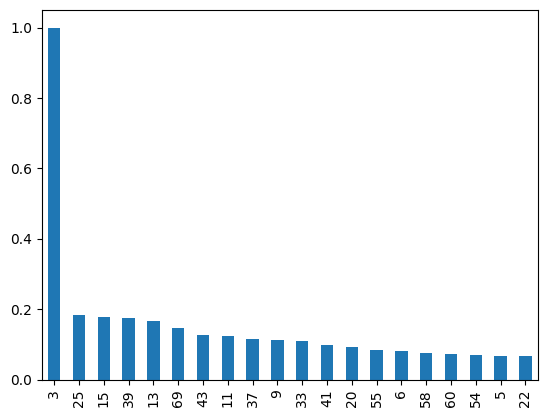

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
short_news_bomb_df['full_text'].loc[3]

'Newsbomb Nέες απειλές κατά της Ελλάδας εξαπέλυσε τη Δευτέρα ο\xa0Ρετζέπ Ταγίπ Ερντογάν\xa0κατά την πρώτη επίσκεψή του στην Κύπρο μετά την επανεκλογή του. "Αν κάποιοι θέλουν να αποτρέψουν την ειρήνη στο Αιγαίο θα πρέπει να εφαρμόσουμε άλλες πολιτικές" δήλωσε πριν από λίγο από τα κατεχόμενα ο Ταγίπ Ερντογάν, σε κοινή συνέντευξη με τον ηγέτη των Τουρκοκυπρίων Ερσίν Τατάρ. ‘’Όσοι επιδίδονται σε ανούσιες εξοπλιστικές δραστηριότητες θα πρέπει να υπολογίζουν προσεκτικά τους κινδύνους που θα επιφέρουν αυτές οι δραστηριότητες’’ ανέφερε παράλληλα, "φωτογραφίζοντας" την Ελλάδα.  ‘’Ο οδικός μας χάρτης είναι σαφής, αυτός ο οδικός χάρτης έχει δείκτη την ειρήνη. Δεν υπάρχει άλλη διέξοδος από αυτές τις θάλασσες παρά μόνο η ειρήνη’’ δήλωσε ο Ερντογάν. ‘’Πάνω από μισός αιώνας (στην Κύπρο) χάθηκε λόγω των ασυμβίβαστων και μαξιμαλιστικών προσεγγίσεων της ελληνοκυπριακής πλευράς. Κανείς δεν αντέχει να χάσει άλλα 50 χρόνια’’ ισχυρίστηκε ο Τούρκος πρόεδρος. ‘’Οι Τουρκοκύπριοι δεν ήταν ποτέ μειονότητα’’, είπ

In [ ]:
short_news_bomb_df['full_text'].loc[48]

'Newsbomb Εκλογές 2023:\xa0Ανάρτηση του Γιάννη Οικονόμου για την αντιπαράθεση που είχε με τον Χρήστο Σπίρτζη «Ο κ. Σπίρτζης ισχυρίστηκε επιθετικά ότι επί κυβέρνησης ΣΥΡΙΖΑ κυκλοφορούσαν στην Αττική 84 ασθενοφόρα. Του απάντησα ότι ψεύδεται και αυτό δεν συνέβη ποτέ. Εκνευρίστηκε μαζί μου και εξεμάνη. Στον πρόεδρο, όμως, των εργαζομένων του ΕΚΑΒ, που με δικαιώνει, έχει κάτι να πει;», αναφέρει σε ανάρτησή του ο πρώην κυβερνητικός εκπρόσωπος και υποψήφιος βουλευτής Φθιώτιδας, Γιάννης Οικονόμου. Επισημαίνει ακόμη ότι «τα τελευταία τραγικά περιστατικά αναδεικνύουν ακόμη πιο επιτακτικά τη δουλειά που πρέπει να γίνει συνολικά στο ΕΣΥ, όμως αυτό δεν σημαίνει ότι πρέπει να εργαλειοποιούνται για μικροκομματική εκμετάλλευση και πολύ περισσότερο να διαστρεβλώνεται η πραγματικότητα». Εθνικές Εκλογές 2023'

In [ ]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

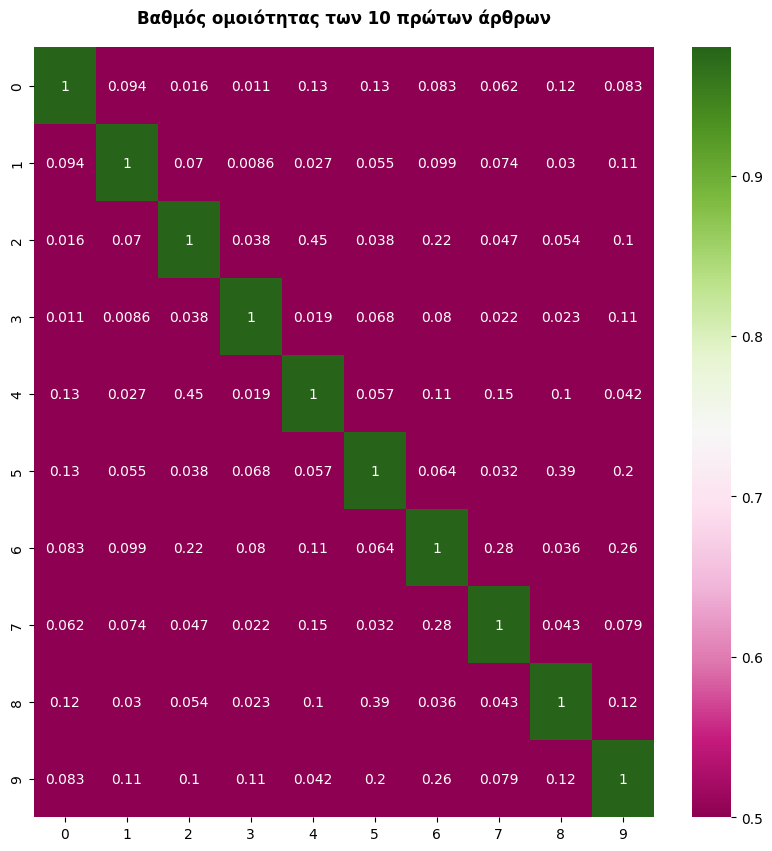

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.5, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

In [ ]:
ertnews_df = pd.read_csv('/content/drive/MyDrive/ertnews.gr-MAY23.csv')
ertnews_df

,site,url,date,section,title,author,text
0,ertnews.gr,https://www.ertnews.gr/eidiseis/o-santiago-pen...,2023-05-01,Αμερική,"Ο Σαντιάγο Πένια, νέος πρόεδρος της Παραγουάης",Συντακτική ομάδα ertnews.gr,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-t...,2023-05-01,ΔΙΕΘΝΗ,Συνάντηση του αρχηγού του ουκρανικού στρατού μ...,Συντακτική ομάδα ertnews.gr,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
2,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/rosia-...,2023-05-01,ΔΙΕΘΝΗ,Ρωσία: Απεβίωσε σε ηλικία 85 ετών ο διάσημος σ...,Συντακτική Ομάδα ertnews.gr,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...
3,ertnews.gr,https://www.ertnews.gr/eidiseis/katastrafike-k...,2023-05-01,ΕΛΛΑΔΑ,Καταστράφηκε καφετέρια στην Αρτέμιδα απο πυρκαγιά,Συντακτική ομάδα ertnews.gr,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...
4,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/tourki...,2023-05-01,ΔΙΕΘΝΗ,Τουρκία: Ο «φερόμενος ηγέτης» του Ισλαμικού Κρ...,Συντακτική Ομάδα ertnews.gr,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...
...,...,...,...,...,...,...,...
4875,ertnews.gr,https://www.ertnews.gr/eidiseis/epistimi/ereyn...,2023-05-31,ΕΠΙΣΤΗΜΗ,Έρευνα: Πώς επηρεάζει τον εγκέφαλο η καρδιακή ...,Εύη Τσιριγωτάκη,Η αποκατάσταση μετά από καρδιακή προσβολή επικ...
4876,ertnews.gr,https://www.ertnews.gr/eidiseis/diethni/dania-...,2023-05-31,ΔΙΕΘΝΗ,Δανία: Η πρωθυπουργός εκφώνησε ομιλία από το C...,Συντακτική ομάδα ertnews.gr,Η πρωθυπουργός της Δανίας Μέτε Φρεντέρικσεν εκ...
4877,ertnews.gr,https://www.ertnews.gr/roi-idiseon/synantisi-p...,2023-05-31,Πολιτική,Συνάντηση ΠτΔ Κ. Σακελλαροπούλου με τον Αρχιεπ...,Συντακτική Ομάδα ertnews.gr,Η Πρόεδρος της Δημοκρατίας Κατερίνα Σακελλαροπ...
4878,ertnews.gr,https://www.ertnews.gr/eidiseis/ellada/politik...,2023-05-31,Πολιτική,ΥΠΕΞ: Βαθιά θλίψη για την απώλεια του Θεόδωρου...,Συντακτική ομάδα ertnews.gr,Σε ανακοίνωση προέβη το Υπουργείο Εξωτερικών γ...


In [ ]:
short_ertnews_df = ertnews_df[['date','text']]

In [ ]:
short_ertnews_df =  ertnews_df[['date','text']]
short_ertnews_df.head(2)

,date,text
0,2023-05-01,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ..."
1,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...


In [ ]:
short_ertnews_df['year'] = pd.DatetimeIndex(short_ertnews_df['date']).year
short_ertnews_df['month'] = pd.DatetimeIndex(short_ertnews_df['date']).month
short_ertnews_df['day'] = pd.DatetimeIndex(short_ertnews_df['date']).day

In [ ]:
short_ertnews_df.head()

,date,text,year,month,day
0,2023-05-01,"Ο Σαντιάγο Πένια, ο υποψήφιος του κυβερνώντος ...",2023,5,1
1,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...,2023,5,1
2,2023-05-01,Απεβίωσε σε ηλικία 85 ετών ο διάσημος Ρώσος σχ...,2023,5,1
3,2023-05-01,Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα...,2023,5,1
4,2023-05-01,Ο «φερόμενος ηγέτης» της τζιχαντιστικής οργάνω...,2023,5,1


In [ ]:
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(short_ertnews_df['text'])

In [ ]:
count_vector.shape

(4880, 90616)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,000389,000euro,000έλληνεςπου,000χρόνων,001,003,0044,005,...,רבה,רבי,שהו,שהוצבו,שירותי,של,שמעון,ἀλχημεία,ἀτελιὲ,ἐλευσῖνα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [ ]:
count_vector = cv.fit_transform(short_ertnews_df['text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,000389,000euro,000έλληνεςπου,000χρόνων,001,003,0044,005,...,רבה,רבי,שהו,שהוצבו,שירותי,של,שמעון,ἀλχημεία,ἀτελιὲ,ἐλευσῖνα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(short_ertnews_df['text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,05,08,09,10,100,105,11,12,...,όριο,όρο,όρος,όρους,όφελος,όχημα,ύψος,ύψους,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_ertnews_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,00,15,2023,30,δήλωσε,δύο,είπε,εκλογές,ελλάδα,ευρώ,κυβέρνηση,μαΐου,νέα,πηγή,πρόεδρος,σήμερα,συριζα,σύμφωνα,χρόνια,χώρα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_ertnews_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,00 14,00 15,08 30,09 00,09 30,14 00,15 00,21ης μαΐου,30 15,αλέξης τσίπρας,απε μπε,εκατ ευρώ,κυριάκος μητσοτάκης,μαΐου 2023,νέα δημοκρατία,νέας δημοκρατίας,πηγές απε,πηγή απε,προεκλογική εκστρατεία,προεκλογικής περιόδου
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

απε μπε                   1145
15 00                      910
09 00                      892
κυριάκος μητσοτάκης        797
00 15                      648
πηγή απε                   610
νέα δημοκρατία             533
08 30                      494
30 15                      480
νέας δημοκρατίας           470
αλέξης τσίπρας             428
εκατ ευρώ                  406
00 14                      374
μαΐου 2023                 356
09 30                      350
πηγές απε                  339
14 00                      330
προεκλογικής περιόδου      326
προεκλογική εκστρατεία     323
21ης μαΐου                 305
dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

απε μπε                1145
15 00                   910
09 00                   892
κυριάκος μητσοτάκης     797
00 15                   648
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['εκλογές', 'Ευρώπη', 'νδ', 'συριζα'])
count_vector = cv.fit_transform(short_ertnews_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


,εκλογές,Ευρώπη,νδ,συριζα
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_ertnews_df['text'])

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,00,000,05,08,09,10,100,11,12,13,...,χρόνια,χρόνο,χωρών,χώρα,χώρας,χώρες,χώρο,ψηφίσουν,ώρα,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.199178,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.11015748 0.06428154 ... 0.11354074 0.07140758 0.06260056]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

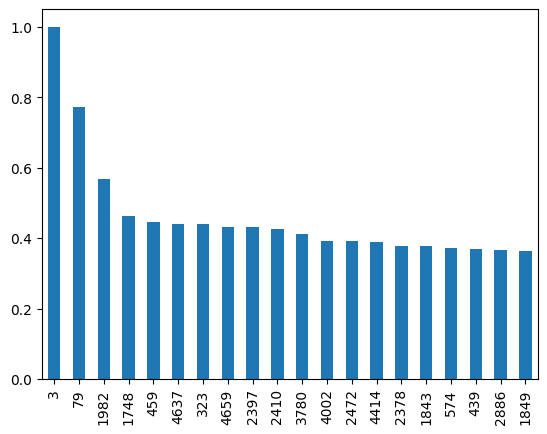

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
short_ertnews_df['text'].loc[3]

'Ολοσχερώς καταστράφηκε καφετέρια στην Αρτέμιδα μετά από πυρκαγιά που ξέσπασε μετά τις 4 τα ξημερώματα στην Λεωφόρο Αρτέμιδος. Στο σημείο επιχείρησαν 20 πυροσβέστες με 6 οχήματα, ενώ τα αίτια του συμβάντος διερευνά το ανακριτικό τμήμα της Πυροσβεστικής .'

In [ ]:
short_ertnews_df['text'].loc[78]

'Με μαζικές συγκεντρώσεις και εκδηλώσεις γιορτάζεται σήμερα η Εργατική Πρωτομαγιά σε όλη τη χώρα. Σε εξέλιξη βρίσκεται η συγκέντρωση της ΓΣΕΕ και της ΑΔΕΔΥ στην πλατεία Κλαυθμώνος, ενώ στο Σύνταγμα το ΠΑΜΕ έχει απευθύνει κάλεσμα για συγκέντρωση. Στις κινητοποιήσεις της Εργατικής Πρωτομαγιάς συμμετέχουν όμως και οι εργαζόμενοι στα Μέσα Μαζικής Μεταφοράς με 24ωρη απεργία. Προηγήθηκαν προσυγκεντρώσεις στα εξής σημεία: Στις 10.30 στη συμβολή των λεωφόρων Αλεξάνδρας και Κηφισίας συγκεντρώθηκαν διανομείς στον επισιτιστικό κλάδο και στις ταχυμεταφορές. Κυκλοφοριακές ρυθμίσεις Κυκλοφοριακές ρυθμίσεις ισχύουν σήμερα στο κέντρο της Αθήνας, λόγω διεξαγωγής εορταστικών εκδηλώσεων για την Εργατική Πρωτομαγιά. Συγκεκριμένα θα πραγματοποιηθεί προσωρινή και σταδιακή διακοπή της κυκλοφορίας από τις 08.00 και απαγόρευση της στάσης και στάθμευσης των οχημάτων από τις 06.00 ώρα, μέχρι το πέρας των εκδηλώσεων στις παρακάτω λεωφόρους και οδούς ως εξής: Ανάλογα με τις επικρατούσες κυκλοφοριακές συνθήκες τα χ

In [ ]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

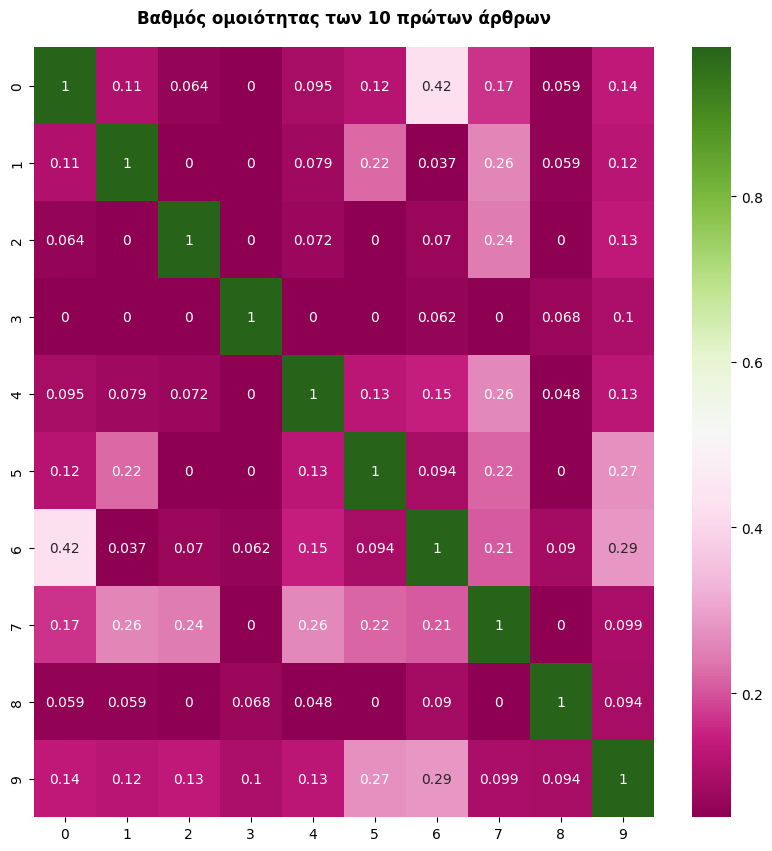

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

([<matplotlib.axis.YTick at 0x7fc2fcb8be20>,
 [Text(0, 0, 'newsbomb.gr'), Text(0, 1, 'ertnews.gr')])

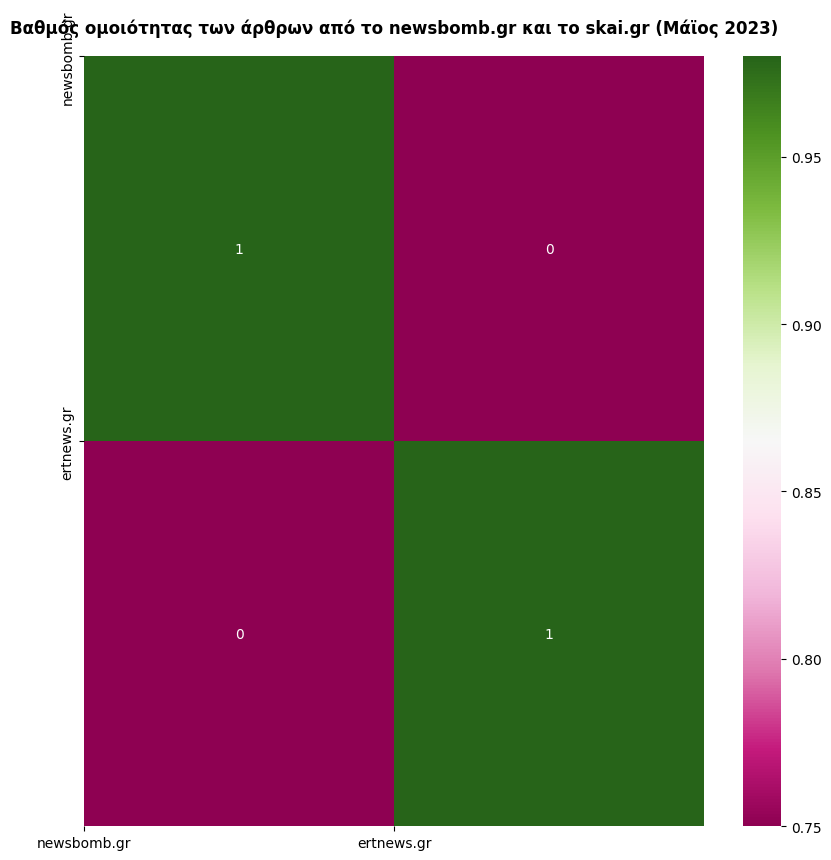

In [ ]:
newsbomb_text = news_bomb_df['full_text'].str.cat(sep = ' ') # text με το κείμενο όλων των άρθρων από την efsyns
ert_text = ertnews_df['text'].str.cat(sep=' ') # text με το κείμενο όλων των άρθρων από τo skai

# φτιάχνω ένα df με τα δύο texts
two_sites_list = [] # φτιάχνω μια λίστα για να βάλω μέσα τα dictionaries που φτιάχνω παρακάτω
newsbombD = {'site' : 'newsbomb.gr', 'text' : 'newsbomb_text'} # φτιάχνω dictionary για την efsyn
two_sites_list.append(newsbombD) # βάζω το dictionary στη λίστα
ertnewsD = {'site' : 'ertnews.gr', 'text' : 'ertnews_text'} # φτιάχνω dictionary για το skai
two_sites_list.append(ertnewsD) # βάζω το dictionary στη λίστα
two_sites_df = pd.DataFrame(two_sites_list) # φτιάχνω dataframe από τη λίστα με τα δύο dictionaries

# στον tfidf_vectorizer, βάζω να συγκρίνει τα rows της στήλης 'text' από το df των 2 sites που έφτιαξα
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])

# φτιάχνω το array της ομοιότητας
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

# φτιάχνω το heatmap
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των άρθρων από το newsbomb.gr και το skai.gr (Μάϊος 2023)', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")
plt.xticks([0, 1], ['newsbomb.gr', 'ertnews.gr']) # ορίζω να εμφανίζονται τα ονόματα των sites αντί για το 0 και 1 του index, στον άξονα x
plt.yticks([0, 1], ['newsbomb.gr', 'ertnews.gr']) # ορίζω να εμφανίζονται τα ονόματα των sites αντί για το 0 και 1 του index, στον άξονα y